<a href="https://colab.research.google.com/github/paruliansaragi/DL-Notebooks/blob/master/Avacado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#check kaggle is there
ls -1ha kaggle.json

kaggle.json


In [0]:
#connect to api
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
#
!chmod 600 ~/.kaggle/kaggle.json

In [0]:
!kaggle datasets download -d neuromusic/avocado-prices

  0% 0.00/629k [00:00<?, ?B/s]
100% 629k/629k [00:00<00:00, 71.2MB/s]


In [0]:
!ls

avocado-prices.zip		kaggle (1).json  updatestatus.2  wget-log.5
basicshapes.zip			kaggle.json	 updatestatus.3  wget-log.6
clouderizer			sample_data	 updatestatus.4  wget-log.7
clouderizer_init.sh		shapes		 wget-log	 wget-log.8
clouderizer.jar			shapes.zip	 wget-log.1	 wget-log.9
clouderizer.service		temp.sh		 wget-log.2
colab_init.sh			updatestatus	 wget-log.3
install_clouderizer_service.sh	updatestatus.1	 wget-log.4


In [0]:
!unzip avocado-prices.zip

Archive:  avocado-prices.zip
  inflating: avocado.csv             


In [0]:
import numpy as np # linear algebra
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import datetime
%matplotlib inline

In [0]:
import pandas as pd

df = pd.read_csv("avocado.csv")

In [0]:
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
Unnamed: 0      18249 non-null int64
Date            18249 non-null object
AveragePrice    18249 non-null float64
Total Volume    18249 non-null float64
4046            18249 non-null float64
4225            18249 non-null float64
4770            18249 non-null float64
Total Bags      18249 non-null float64
Small Bags      18249 non-null float64
Large Bags      18249 non-null float64
XLarge Bags     18249 non-null float64
type            18249 non-null object
year            18249 non-null int64
region          18249 non-null object
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


Text(0.5,1,'Average Price of Avocado According to Region')

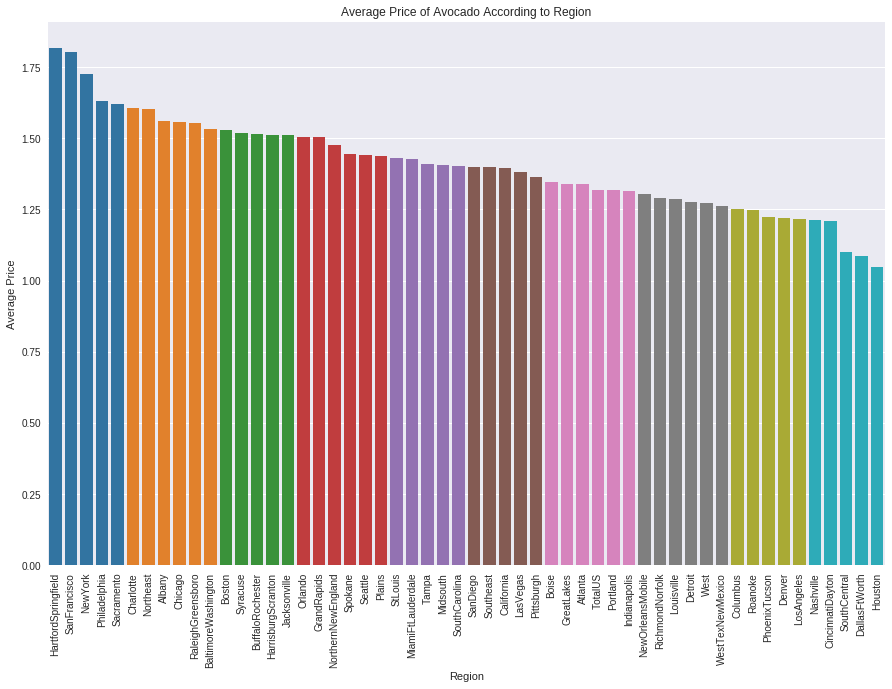

In [0]:
region_list=list(df.region.unique())
average_price=[]

for i in region_list:
    x=df[df.region==i]
    region_average=sum(x.AveragePrice)/len(x)
    average_price.append(region_average)

df1=pd.DataFrame({'region_list':region_list,'average_price':average_price})
new_index=df1.average_price.sort_values(ascending=False).index.values
sorted_data=df1.reindex(new_index)

plt.figure(figsize=(15,10))
ax=sns.barplot(x=sorted_data.region_list,y=sorted_data.average_price,palette='Vega10')

plt.xticks(rotation=90)
plt.xlabel('Region')
plt.ylabel('Average Price')
plt.title('Average Price of Avocado According to Region')

In [0]:
dates = [datetime.datetime.strptime(ts, "%Y-%m-%d") for ts in df['Date']]
dates.sort()
sorteddates = [datetime.datetime.strftime(ts, "%Y-%m-%d") for ts in dates]
df['Date'] = pd.DataFrame({'Date':sorteddates})
df['Year'], df['Month'],  df['Day'] = df['Date'].str.split('-').str
df.drop(['Date'], axis=1)
df.head(10)

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Year,Month,Day
0,2015-01-04,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,2015,01,04
1,2015-01-04,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,2015,01,04
2,2015-01-04,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,2015,01,04
3,2015-01-04,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,2015,01,04
4,2015-01-04,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,2015,01,04
5,2015-01-04,1.26,55979.78,1184.27,48067.99,43.61,6683.91,6556.47,127.44,0.0,conventional,2015,Albany,2015,01,04
6,2015-01-04,0.99,83453.76,1368.92,73672.72,93.26,8318.86,8196.81,122.05,0.0,conventional,2015,Albany,2015,01,04
7,2015-01-04,0.98,109428.33,703.75,101815.36,80.00,6829.22,6266.85,562.37,0.0,conventional,2015,Albany,2015,01,04
8,2015-01-04,1.02,99811.42,1022.15,87315.57,85.34,11388.36,11104.53,283.83,0.0,conventional,2015,Albany,2015,01,04
9,2015-01-04,1.07,74338.76,842.40,64757.44,113.00,8625.92,8061.47,564.45,0.0,conventional,2015,Albany,2015,01,04


Text(0.5,1,'Average Price')

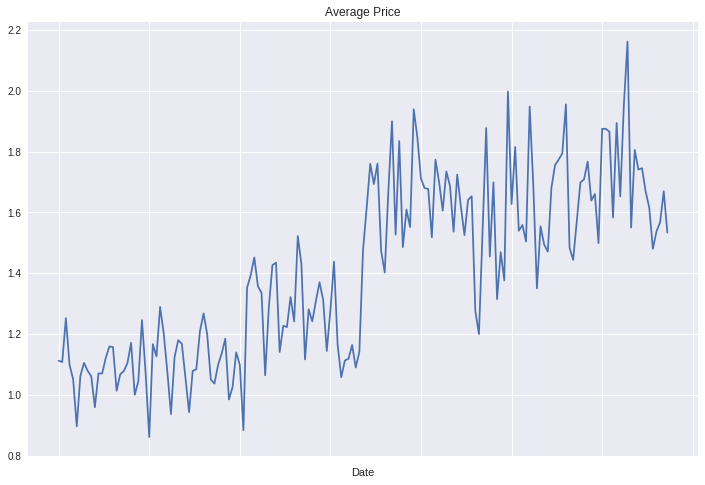

In [0]:
byDate=df.groupby('Date').mean()
plt.figure(figsize=(12,8))
byDate['AveragePrice'].plot()
plt.title('Average Price')

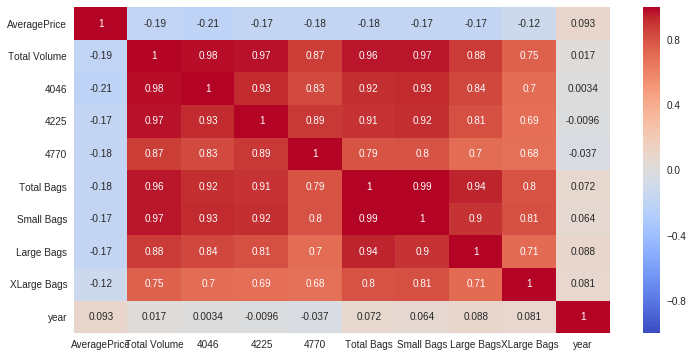

In [0]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(),cmap='coolwarm',annot=True)

In [0]:
df['region'].nunique()
PREDICTION_TYPE = 'conventional'
df = df[df.type == PREDICTION_TYPE]

In [0]:
df_final= df.drop(['region','Date'],axis=1)
df_final.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,Year,Month,Day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,2015,01,04
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,2015,01,04
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,2015,01,04
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,2015,01,04
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,2015,01,04


In [0]:
X=df_final.iloc[:,1:14]
X

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,Year,Month,Day
0,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,conventional,2015,2015,01,04
1,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,conventional,2015,2015,01,04
2,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,conventional,2015,2015,01,04
3,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,conventional,2015,2015,01,04
4,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,conventional,2015,2015,01,04
5,55979.78,1184.27,48067.99,43.61,6683.91,6556.47,127.44,0.00,conventional,2015,2015,01,04
6,83453.76,1368.92,73672.72,93.26,8318.86,8196.81,122.05,0.00,conventional,2015,2015,01,04
7,109428.33,703.75,101815.36,80.00,6829.22,6266.85,562.37,0.00,conventional,2015,2015,01,04
8,99811.42,1022.15,87315.57,85.34,11388.36,11104.53,283.83,0.00,conventional,2015,2015,01,04
9,74338.76,842.40,64757.44,113.00,8625.92,8061.47,564.45,0.00,conventional,2015,2015,01,04


In [0]:
y=df_final['AveragePrice']

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
y

0       1.33
1       1.35
2       0.93
3       1.08
4       1.28
5       1.26
6       0.99
7       0.98
8       1.02
9       1.07
10      1.12
11      1.28
12      1.31
13      0.99
14      1.33
15      1.28
16      1.11
17      1.07
18      1.34
19      1.33
20      1.12
21      1.45
22      1.11
23      1.26
24      1.05
25      1.35
26      1.37
27      1.27
28      1.32
29      1.07
        ... 
9096    0.97
9097    0.87
9098    1.09
9099    1.08
9100    1.20
9101    1.13
9102    0.93
9103    0.99
9104    1.00
9105    0.96
9106    0.97
9107    0.98
9108    0.93
9109    0.83
9110    1.01
9111    1.04
9112    1.05
9113    1.08
9114    0.84
9115    0.88
9116    0.94
9117    0.88
9118    0.88
9119    0.89
9120    0.75
9121    0.76
9122    0.85
9123    0.84
9124    0.90
9125    0.88
Name: AveragePrice, Length: 9126, dtype: float64

In [0]:
X_test = X_test.drop(["type"], axis=1)
X_test.head()

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Year,Month,Day
3107,149462.64,1511.79,64644.20,44.46,83262.19,83262.19,0.00,0.00,2016,2015,07,19
3567,151840.62,1949.63,84537.07,4986.35,60367.57,50741.23,7308.23,2318.11,2016,2015,08,23
3133,6075588.68,2357903.80,1924933.51,117423.95,1675327.42,1583961.67,53653.13,37712.62,2016,2015,07,26
3317,210904.76,3172.25,126850.83,7482.64,73399.04,19111.28,52395.60,1892.16,2016,2015,08,02
8423,7432376.14,2158521.28,1969740.61,130700.84,3173413.41,2194867.87,974954.56,3590.98,2017,2016,07,03


In [0]:
X_train.head()

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Year,Month,Day
4339,3736814.35,196491.18,2123945.28,74756.02,1341621.87,1208291.71,68637.43,64692.73,2016,2015,10,11
9054,165209.29,80921.04,7515.78,518.71,76253.76,65742.81,10499.14,11.81,2018,2016,08,07
5856,581303.33,5379.22,452146.49,3286.69,120490.93,112280.36,5416.40,2794.17,2017,2016,01,17
3412,1366439.71,620139.86,308643.70,77616.60,360039.55,341082.58,16387.52,2569.45,2016,2015,08,09
6194,163084.68,66807.47,32338.23,1335.12,62603.86,54598.58,8001.06,4.22,2017,2016,02,07


In [0]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)
pred=lr.predict(X_test)

In [0]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 0.18544922801668748
MSE: 0.05731989331465937
RMSE: 0.23941573322290113


In [0]:
from sklearn.model_selection import cross_val_score
lr_scores = cross_val_score(lr, X_train, y_train, cv=10)
print('SVM Cross Validation Score model Score: ')
print(lr_scores.mean())


SVM Cross Validation Score model Score: 
0.1889978010887263
